In [1]:
'''IF PLOTLY NOT INSTALLED PLEASE UNCOMMENT AND RUN INSTALL PLOTLY SCRIPT'''
#! pip3 install plotly
#Import Library

import pandas as pd
import numpy as np
import re
import csv
import plotly.express as px
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats


In [3]:
toulouse_data = pd.read_csv("./toulouse_data_clean.csv", encoding = "ISO-8859-1")

In [4]:
toulouse_data.head()

,Unnamed: 0,Date,ID,Hotel_Name,Price,Stars,Reviews_score,Reviews_classification,Number_reviews,Location,...,Location_Score,Longitude,Latitude,Metro_access,Features,Bed_configuration,Night,Occupancy,Taxe,Web_page
0,0,1,51949,Campanile Toulouse Purpan,69,3,8.4,Very good,2951,Toulouse West,...,0.0,1.393729,43.606810,NaN,1 Double Bed & 1 Junior Bed - Room Next Genera...,"2 beds (1 single, 1 double)","1 night, 1 adult",1 - 2 guests,includes taxes and charges,https://www.booking.com/hotel/fr/campanilepurp...
1,1,1,22819,Le Grand Balcon Hotel,125,4,8.9,Fabulous,1084,Toulouse City-Centre,...,9.8,1.442495,43.604874,Metro access,Classic Double Room,Beds: 1 double or 2 singles,"1 night, 1 adult",1 - 2 guests,includes taxes and charges,https://www.booking.com/hotel/fr/le-grand-balc...
2,2,1,55284,Best Western Hotel Innes Toulouse Centre,87,4,8.4,Very good,869,Toulouse City-Centre,...,0.0,1.447088,43.610609,Metro access,Classic Double Room,1 double bed,"1 night, 1 adult",1 - 2 guests,includes taxes and charges,https://www.booking.com/hotel/fr/best-western-...
3,3,1,809743,Residhotel Toulouse Centre,69,3,8.1,Very good,1183,Toulouse City-Centre,...,0.0,1.441205,43.595392,Metro access,Studio,1 large double bed,"1 night, 1 adult",1 - 2 guests,includes taxes and charges,https://www.booking.com/hotel/fr/residhotel-to...
4,4,1,57388,Pullman Toulouse Centre Ramblas,165,5,8.6,Fabulous,758,Toulouse City-Centre,...,0.0,1.453344,43.608542,Metro access,Superior Twin Room,2 single beds,"1 night, 1 adult",1 - 2 guests,includes taxes and charges,https://www.booking.com/hotel/fr/toulouse-cent...


In [34]:
toulouse_data.Price.mean()

82.88463395012067

In [35]:
max(toulouse_data.Price)

395

In [36]:
min(toulouse_data.Price)

27

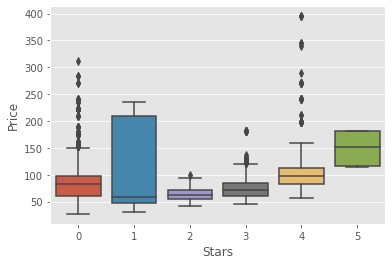

In [5]:
sns.boxplot(x = 'Stars', y= 'Price', data=toulouse_data)

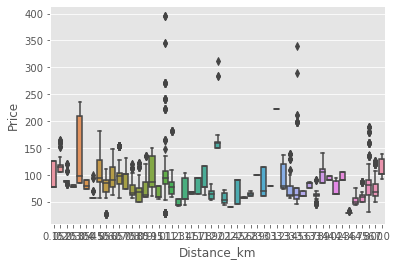

In [6]:
sns.boxplot(x = 'Distance_km', y= 'Price', data=toulouse_data)

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


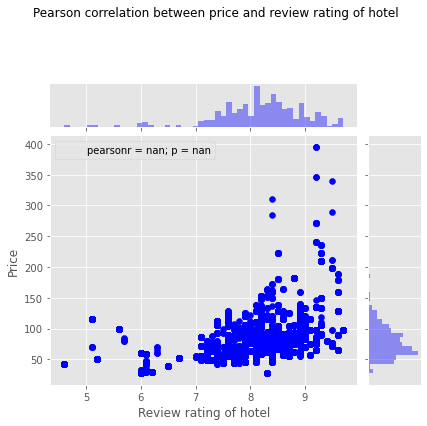

In [8]:
plotrating = sns.jointplot(toulouse_data.Reviews_score, toulouse_data.Price, color = 'blue')
plotrating.annotate(stats.pearsonr)
plt.subplots_adjust(top=0.8)
plotrating.fig.suptitle('Pearson correlation between price and review rating of hotel')
plotrating.set_axis_labels('Review rating of hotel', 'Price')
plt.show()

In [12]:
#MAP With Geographical position
fig = px.scatter_mapbox(toulouse_data, lat= 'Latitude', lon= 'Longitude', hover_name= 'Hotel_Name',  hover_data= ["Price"],
                        color_discrete_sequence=["blue"], zoom=12, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [17]:
hotel_loc = toulouse_data.groupby('ID')

px.set_mapbox_access_token(open("./My_Mapbox_token.txt").read())

fig = px.scatter_mapbox(toulouse_data, lat="Latitude", lon="Longitude",     color="Distance_km", size="Price",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

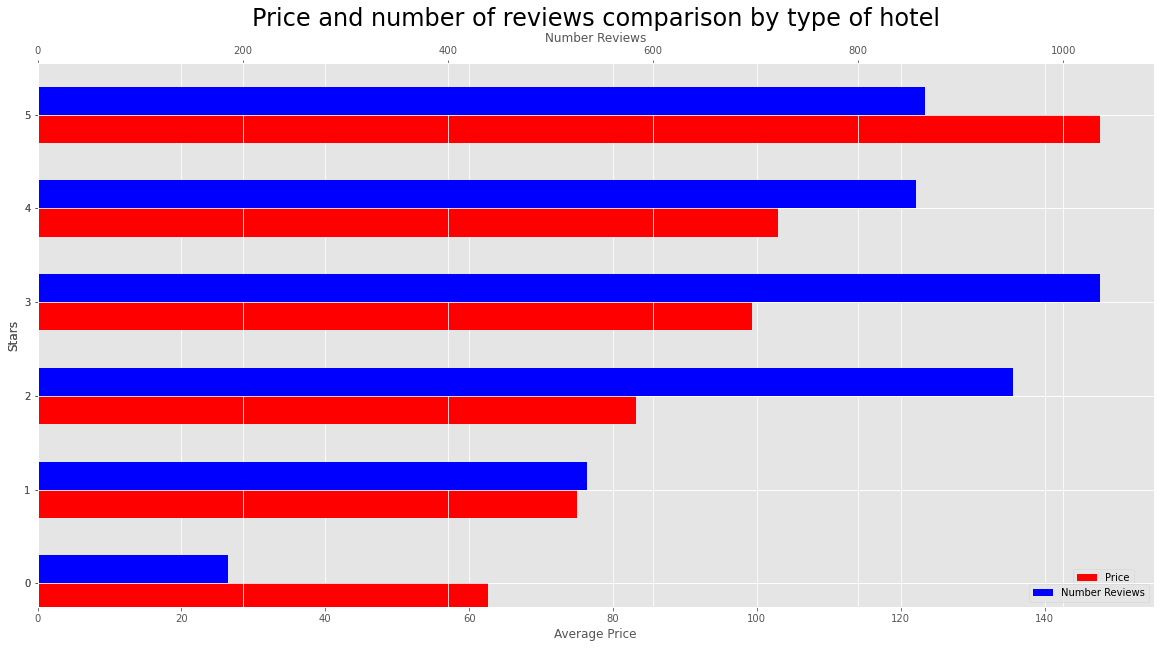

In [18]:
# Plot Price and number of reviews comparison by type of hotel

Price_Avg = toulouse_data.groupby('Stars')['Price'].mean()
ReviewsPerStars = toulouse_data.groupby('Stars')['Number_reviews'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = Price_Avg.sort_values(ascending=True).plot(kind='barh', color='red', ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = ReviewsPerStars.plot(kind='barh', color='blue', ax=ax2, width=width, position=0,legend = True,label = 'Number Reviews')


ax.set_xlabel('Average Price')
ax2.set_xlabel('Number Reviews')
#plt.ylabel('House Type')
plt.title('Price and number of reviews comparison by type of hotel', fontsize=24)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

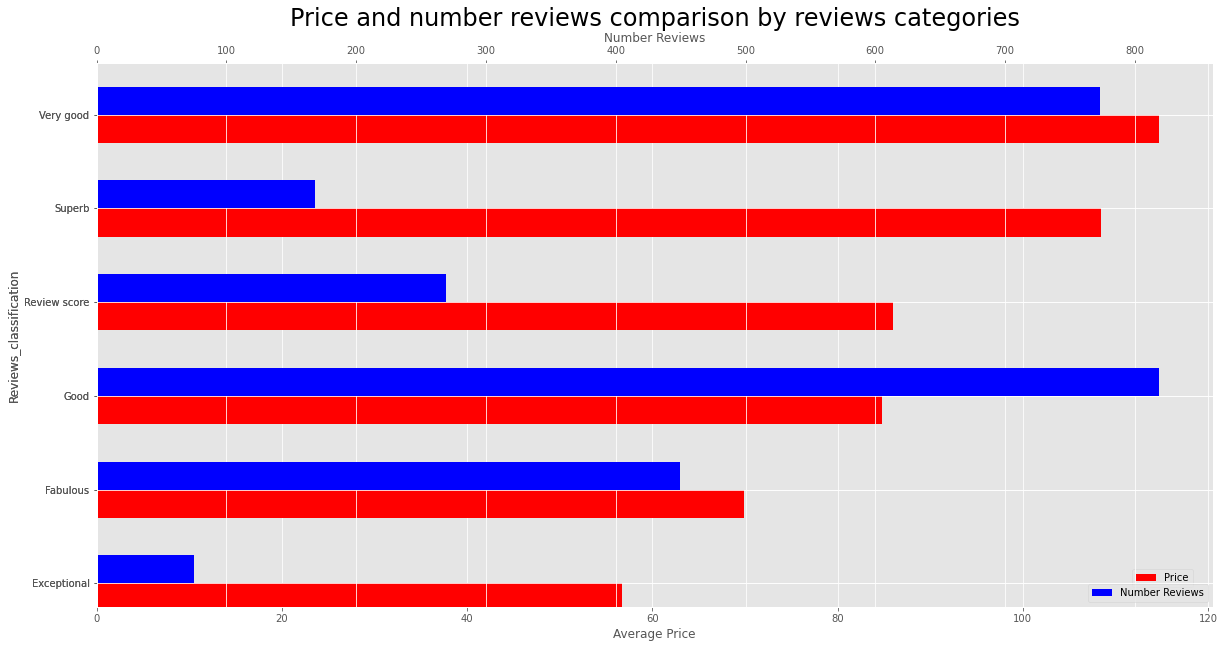

In [19]:
# Plot Price and popularity comparison by type of House in Manhattan

Price_Avg = toulouse_data.groupby('Reviews_classification')['Price'].mean()
Reviews_Classification_Avg = toulouse_data.groupby('Reviews_classification')['Number_reviews'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = Price_Avg.sort_values(ascending=True).plot(kind='barh', color='red', ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = Reviews_Classification_Avg.plot(kind='barh', color='blue', ax=ax2, width=width, position=0,legend = True,label = 'Number Reviews')


ax.set_xlabel('Average Price')
ax2.set_xlabel('Number Reviews')
#plt.ylabel('House Type')
plt.title('Price and number reviews comparison by reviews categories', fontsize=24)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

In [20]:
toulouse = toulouse_data.groupby('ID').mean()

(array([114.,   4.,  29.,  48.,  32.]),
 array([0., 1., 2., 3., 4., 5.]),
 <a list of 5 Patch objects>)

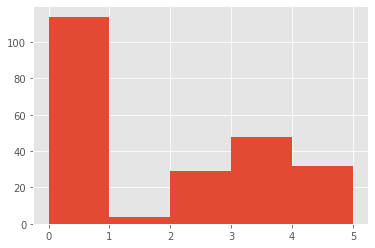

In [21]:
plt.hist(toulouse['Stars'], bins=5)

In [22]:
toulouse_grp_stars = toulouse_data.groupby(['Date', 'Stars']).mean()
toulousedf = toulouse_grp_stars.reset_index(['Date', 'Stars'])

In [23]:
fig = px.line(toulousedf, x=toulousedf['Date'], y= toulousedf['Price'], color= toulousedf['Stars'], title="Price Evolution over December")
fig.update_traces(mode="lines")

fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)

fig.show()

In [24]:
toulouse_grp_distance = toulouse_data.groupby(['ID']).mean()

In [25]:
toulousedf_distance = toulouse_grp_distance.reset_index(['ID'])

In [26]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter(toulousedf_distance, x="Distance_km", y="Price", color="Stars",
                 size='Price')
fig.show()